In [13]:
import os
from dotenv import load_dotenv

import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt

load_dotenv()
project_id = os.getenv("PROJECT_ID")

In [2]:
# Get data
df = pandas_gbq.read_gbq(
    f"select * from metrics.detection_rate_frames_per_second",
    project_id=project_id,
    use_bqstorage_api=True,
)

df.set_index("ts", inplace=True)
df.drop(columns=["timestamp_ms"], inplace=True)
df.sort_index(inplace=True)

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████|


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88339 entries, 2024-01-18 04:48:30+00:00 to 2024-02-17 20:57:30+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tower_A  86029 non-null  float64
 1   tower_B  21174 non-null  float64
 2   tower_C  19698 non-null  float64
 3   tower_D  17154 non-null  float64
dtypes: float64(4)
memory usage: 3.4 MB


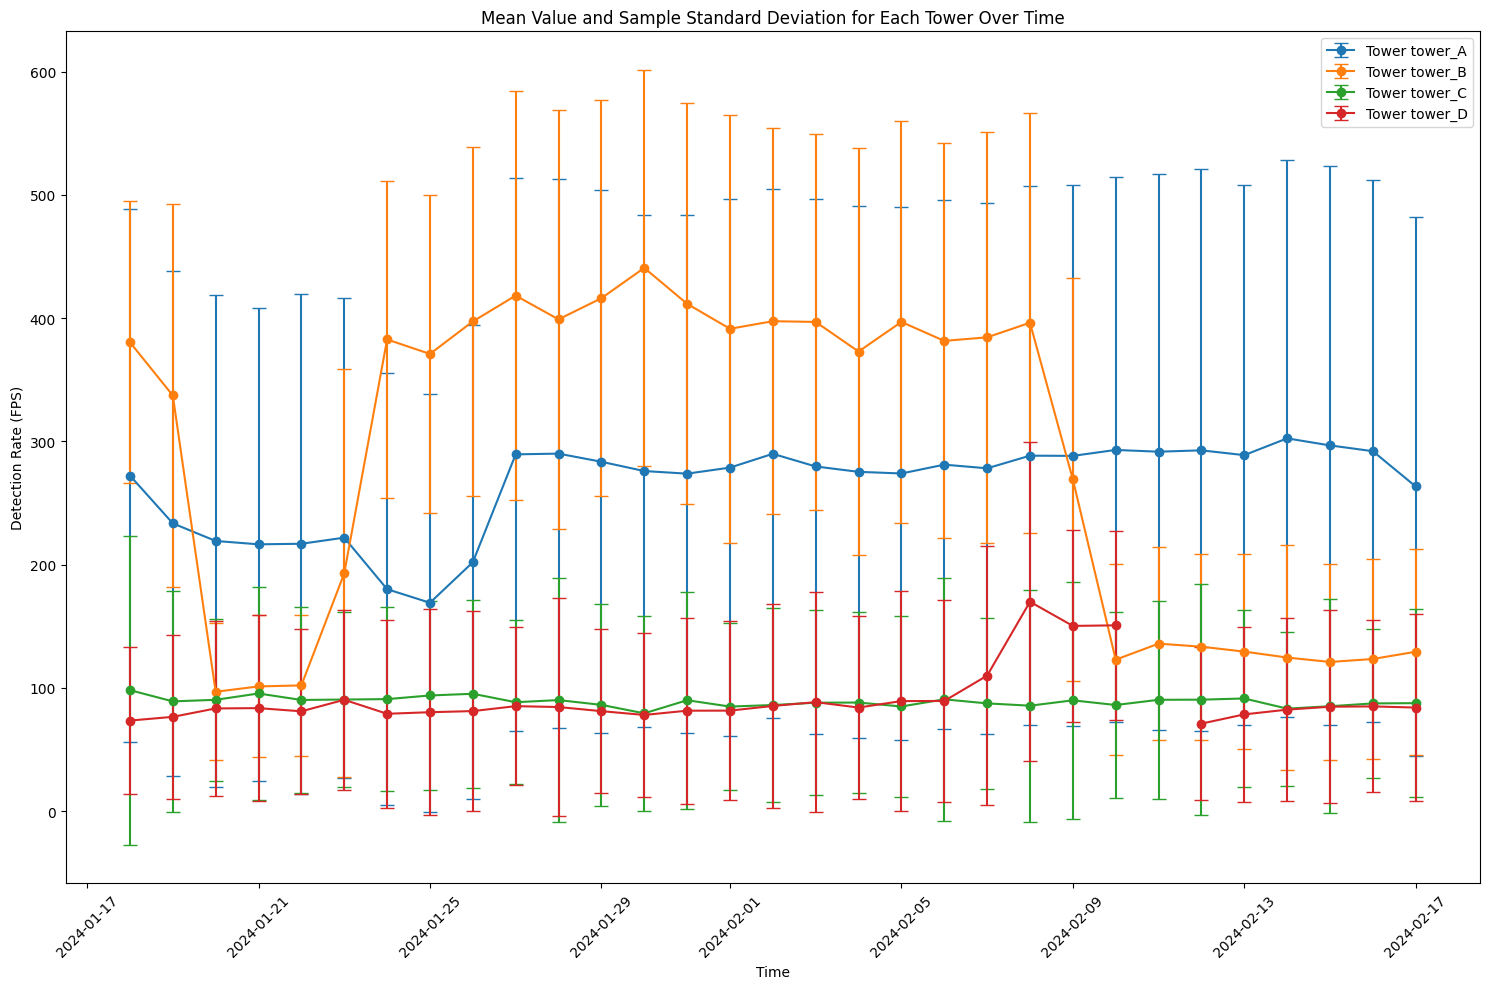

In [12]:
resampled_df = df.resample('1d').agg(['mean', 'std'])
resampled_df

# Create a plot for each tower
plt.figure(figsize=(15, 10))

for column in resampled_df.columns.levels[0]:  # Assuming each tower's data is in a separate column
    # Extract mean and standard deviation for the tower
    means = resampled_df[column]['mean']
    errors = resampled_df[column]['std']
    
    # Plot with error bars
    plt.errorbar(means.index, means, yerr=errors, label=f'Tower {column}', fmt='-o', capsize=5)

plt.title('Mean Value and Sample Standard Deviation for Each Tower Over Time')
plt.xlabel('Time')
plt.ylabel('Detection Rate (FPS)')  # Adjust label according to what 'Value' represents (e.g., Temperature, Count)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()